# Project: Sleeping Quality
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ml">ML Modeling</a></li> **Work in Progress**
<li><a href="#re">Results of Project</a></li>


</ul>

<a id='intro'></a>
## Introduction

**Our sleeping quality indicators: **

*Score indices* : **0 ----> no difficulty** to **3 ----> severe difficulty**
- hours of sleep

 $\gt$ 7 hours = 0 score
 °°° 6-7 hours = 1 score
 °°° 5-6 hours = 2 score
 °°° $\lt$ 5 hours = 3 score

- time falling asleep 

 $\lt$ 15 minutes = 0 score
 °°° 16-30 minutes = 1 score
 °°° 31-60 minutes = 2 score
 °°° $\gt$ 60 minutes = 3 score

- times of waking at night

 $\lt$ 2 times = 0 score
°°° 2 times =  1 score
 °°° 3 times = 2 score 
 °°° $\gt$ 4 times = 3 score


** What we want to analyze / visualize: ** 
                                                                                                          
- A general overview of the situation of the students at the beginning of the study (visualisation of 1st survey's results)

- The individual evolution of sleeping quality (is it getting better, worse or the same?)

- The correlation between sleeping quality and others parameters ('alone','have pet', 'screen time','stress level', 'time outside', 'meeting friends') 
---Can we find a correlation somewhere or not? (Heatmap)

- The correlation between sleeping quality's parameters ('hours of sleep', 'time fall asleep','times of wake) and other parameters (same than above)

<a id='wrangling'></a>
## Data Wrangling

> After uploading the data, We will perform the clearing, deleting, editing and explore operations in this section in order to get it ready for analysis. Therefore, We need some important libraries which are has been imported at below.

In [450]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import datetime
import re

In [451]:
# Read Data from the main survey
df = pd.read_csv('Sleeping quality.csv')
df.head(2)

,Timestamp,Username,Were you in France during lockdowns? / Étiez-vous en France pendant le confinement ?,Are you following courses in France? / Suivez-vous vos cours en France ?,Your current student status / Votre niveau d'étude actuel,Are you a CRI student? / Etes-vous étudiant au CRI ?,Your age / Votre âge,To which gender do you identify? / A quel genre vous identifiez-vous ?,Are you living alone? / Vivez-vous seul ?,Do you have a pet living with you? / Vivez-vous avec un animal de compagnie ?,How many hours do you spend outdoors daily? (average) / Combien de temps passez-vous à l'extérieur par jour (en moyenne) ?,"How many times per week you get to meet some friends/family/colleagues not currently living with you? (average) / Combien de fois par semaine voyez-vous des amis, de la famille ou des collègues qui n'habitent pas actuellement avec vous ?","How many hours do you spend daily in front of a screen (TV, PC, phone...) (average)? / Combien d'heures passez-vous chaque jour devant un écran (télévision, ordinateur, téléphone... (en moyenne) ?","On average, when do you go to bed? / En moyenne, à quelle heure vous couchez-vous ?","On average, when do you wake up? / En moyenne, à quelle heure vous réveillez-vous ?","On average and during the last week, how often have you felt stressed out? / En moyenne, combien de fois vous êtes-vous sentis stressés cette semaine ?","On average, how many times do you wake up while sleeping every night? / En moyenne, à quelle fréquence vous réveillez-vous la nuit ?","On average, how long does it take to fall asleep? / En général, combien de temps mettez-vous à vous endormir ?",Agreement for data collection and further participation / Accord pour la collecte de donnée et participation à l'enquête
0,2021/11/16 5:23:06 PM GMT+1,michael.rera@cri-paris.org,Yes / Oui,Yes / Oui,PhD / Doctorat,No / Non,>30,Male / Homme,Yes / Oui,No / Non,3,4,10,00:00,08:30,Everyday / Tous les jours,1,30 min to 1h / De 30 minutes à 1h,I agree to share these data / J'accepte de par...
1,2021/11/24 2:47:12 PM GMT+1,yasamin.nematollahi@cri-paris.org,Iran,Yes / Oui,Master,Yes / Oui,28 - 30,Female / Femme,Yes / Oui,No / Non,7,4,4,00:00,08:00,A few times (once or twice) / Quelques fois (u...,1,15 to 30 min / De 15 à 30 minutes,I agree to share these data / J'accepte de par...


In [452]:
df.shape

(55, 19)

##  Main survey : Questions asked
Asked on both languages (ENG/FR)

In [453]:
# #reorganize the df

df = df.loc[:, ['Timestamp',
 'Your age / Votre âge',
  'To which gender do you identify? / A quel genre vous identifiez-vous ?',
 "Your current student status / Votre niveau d'étude actuel",
 'Are you a CRI student? / Etes-vous étudiant au CRI ?',
 'Are you living alone? / Vivez-vous seul ?',
 'Do you have a pet living with you? / Vivez-vous avec un animal de compagnie ?',
 "How many hours do you spend daily in front of a screen (TV, PC, phone...) (average)? / Combien d'heures passez-vous chaque jour devant un écran (télévision, ordinateur, téléphone... (en moyenne) ?",
 'On average and during the last week, how often have you felt stressed out? / En moyenne, combien de fois vous êtes-vous sentis stressés cette semaine ?',
 'On average, when do you go to bed? / En moyenne, à quelle heure vous couchez-vous ?',
 'On average, when do you wake up? / En moyenne, à quelle heure vous réveillez-vous ? ',
 "How many hours do you spend outdoors daily? (average) / Combien de temps passez-vous à l'extérieur par jour (en moyenne) ?",
 "How many times per week you get to meet some friends/family/colleagues not currently living with you? (average) / Combien de fois par semaine voyez-vous des amis, de la famille ou des collègues qui n'habitent pas actuellement avec vous ? ",
 'On average, how many times do you wake up while sleeping every night? / En moyenne, à quelle fréquence vous réveillez-vous la nuit ?',
  'Are you following courses in France? / Suivez-vous vos cours en France ?',
 'Were you in France during lockdowns? / Étiez-vous en France pendant le confinement ?',
 "Agreement for data collection and further participation / Accord pour la collecte de donnée et participation à l'enquête",
  'Username',
 'On average, how long does it take to fall asleep? / En général, combien de temps mettez-vous à vous endormir ?']]


In [454]:
list_col = df.columns.tolist()
list_col

['Timestamp',
 'Your age / Votre âge',
 'To which gender do you identify? / A quel genre vous identifiez-vous ?',
 "Your current student status / Votre niveau d'étude actuel",
 'Are you a CRI student? / Etes-vous étudiant au CRI ?',
 'Are you living alone? / Vivez-vous seul ?',
 'Do you have a pet living with you? / Vivez-vous avec un animal de compagnie ?',
 "How many hours do you spend daily in front of a screen (TV, PC, phone...) (average)? / Combien d'heures passez-vous chaque jour devant un écran (télévision, ordinateur, téléphone... (en moyenne) ?",
 'On average and during the last week, how often have you felt stressed out? / En moyenne, combien de fois vous êtes-vous sentis stressés cette semaine ?',
 'On average, when do you go to bed? / En moyenne, à quelle heure vous couchez-vous ?',
 'On average, when do you wake up? / En moyenne, à quelle heure vous réveillez-vous ? ',
 "How many hours do you spend outdoors daily? (average) / Combien de temps passez-vous à l'extérieur par 

In [455]:
# Rename columns names for clearer/easy data wrangling

column_name = ['time', 'age','gender', 'education_level', 'cri_student', 
                'alone','have_pet', 'screen_time','stress_level', 'sleep_time','wake_time',
                'time_outside','meeting_friends', 'times_of_wake', 'in_france','in_france_during_LD',
                'agrement','email','time_fall_asleep' ]




In [456]:
res = {list_col[i]: column_name[i] for i in range(len(list_col))} 
df = df.rename(columns=res)

In [457]:
df.head()

,time,age,gender,education_level,cri_student,alone,have_pet,screen_time,stress_level,sleep_time,wake_time,time_outside,meeting_friends,times_of_wake,in_france,in_france_during_LD,agrement,email,time_fall_asleep
0,2021/11/16 5:23:06 PM GMT+1,>30,Male / Homme,PhD / Doctorat,No / Non,Yes / Oui,No / Non,10,Everyday / Tous les jours,00:00,08:30,3,4,1,Yes / Oui,Yes / Oui,I agree to share these data / J'accepte de par...,michael.rera@cri-paris.org,30 min to 1h / De 30 minutes à 1h
1,2021/11/24 2:47:12 PM GMT+1,28 - 30,Female / Femme,Master,Yes / Oui,Yes / Oui,No / Non,4,A few times (once or twice) / Quelques fois (u...,00:00,08:00,7,4,1,Yes / Oui,Iran,I agree to share these data / J'accepte de par...,yasamin.nematollahi@cri-paris.org,15 to 30 min / De 15 à 30 minutes
2,2021/11/24 3:57:49 PM GMT+1,18 - 22,Female / Femme,Bachelor / Licence,No / Non,No / Non,No / Non,5,A few times (once or twice) / Quelques fois (u...,23:30,07:30,1,4,0,Yes / Oui,Yes / Oui,I agree to share these data / J'accepte de par...,lagiere.m@gmail.com,Instantly - less than 15 min / Instantanément ...
3,2021/11/24 3:58:07 PM GMT+1,23 - 27,Male / Homme,Master,No / Non,No / Non,No / Non,6,Everyday / Tous les jours,23:30,07:30,10,3,1,Yes / Oui,Yes / Oui,I agree to share these data / J'accepte de par...,lorenzocolombo1998@gmail.com,15 to 30 min / De 15 à 30 minutes
4,2021/11/24 3:58:24 PM GMT+1,18 - 22,Female / Femme,Master,No / Non,No / Non,"Yes and it doesn't require to go out / Oui, un...",3,A few times (once or twice) / Quelques fois (u...,00:00,07:00,15,6,1,Yes / Oui,Yes / Oui,I agree to share these data / J'accepte de par...,fannylemant@yahoo.fr,Instantly - less than 15 min / Instantanément ...


In [458]:
df.columns

Index(['time', 'age', 'gender', 'education_level', 'cri_student', 'alone',
       'have_pet', 'screen_time', 'stress_level', 'sleep_time', 'wake_time',
       'time_outside', 'meeting_friends', 'times_of_wake', 'in_france',
       'in_france_during_LD', 'agrement', 'email', 'time_fall_asleep'],
      dtype='object')

In [459]:
df = df.drop(['time','agrement'], axis = 1)
df

,age,gender,education_level,cri_student,alone,have_pet,screen_time,stress_level,sleep_time,wake_time,time_outside,meeting_friends,times_of_wake,in_france,in_france_during_LD,email,time_fall_asleep
0,>30,Male / Homme,PhD / Doctorat,No / Non,Yes / Oui,No / Non,10,Everyday / Tous les jours,00:00,08:30,3,4,1,Yes / Oui,Yes / Oui,michael.rera@cri-paris.org,30 min to 1h / De 30 minutes à 1h
1,28 - 30,Female / Femme,Master,Yes / Oui,Yes / Oui,No / Non,4,A few times (once or twice) / Quelques fois (u...,00:00,08:00,7,4,1,Yes / Oui,Iran,yasamin.nematollahi@cri-paris.org,15 to 30 min / De 15 à 30 minutes
2,18 - 22,Female / Femme,Bachelor / Licence,No / Non,No / Non,No / Non,5,A few times (once or twice) / Quelques fois (u...,23:30,07:30,1,4,0,Yes / Oui,Yes / Oui,lagiere.m@gmail.com,Instantly - less than 15 min / Instantanément ...
3,23 - 27,Male / Homme,Master,No / Non,No / Non,No / Non,6,Everyday / Tous les jours,23:30,07:30,10,3,1,Yes / Oui,Yes / Oui,lorenzocolombo1998@gmail.com,15 to 30 min / De 15 à 30 minutes
4,18 - 22,Female / Femme,Master,No / Non,No / Non,"Yes and it doesn't require to go out / Oui, un...",3,A few times (once or twice) / Quelques fois (u...,00:00,07:00,15,6,1,Yes / Oui,Yes / Oui,fannylemant@yahoo.fr,Instantly - less than 15 min / Instantanément ...
5,18 - 22,Female / Femme,Bachelor / Licence,No / Non,No / Non,No / Non,4,A few times (once or twice) / Quelques fois (u...,23:30,07:00,2,7,0,Yes / Oui,Yes / Oui,marie.gareau99@gmail.com,Instantly - less than 15 min / Instantanément ...
6,18 - 22,Male / Homme,Master,No / Non,Yes / Oui,No / Non,10,Often (three or four times) / Souvent (trois o...,12:30,07:00,10,7,2,Yes / Oui,Yes / Oui,nathan.finance@hotmail.fr,Instantly - less than 15 min / Instantanément ...
7,18 - 22,Female / Femme,Bachelor / Licence,No / Non,No / Non,"Yes and it doesn't require to go out / Oui, un...",6,Often (three or four times) / Souvent (trois o...,00:00,07:10,10,5,0,Yes / Oui,Yes / Oui,touativalentine0@gmail.com,15 to 30 min / De 15 à 30 minutes
8,18 - 22,Male / Homme,Master,No / Non,No / Non,No / Non,5,A few times (once or twice) / Quelques fois (u...,00:30,06:30,6,1,0,Yes / Oui,Yes / Oui,alexandre@glastra.fr,15 to 30 min / De 15 à 30 minutes
9,18 - 22,Female / Femme,Bachelor / Licence,No / Non,No / Non,No / Non,5,A few times (once or twice) / Quelques fois (u...,00:00,09:00,10,4,1,Yes / Oui,Yes / Oui,prashamsakc2.0@gmail.com,More than 1h / Plus d'1h


In [460]:
# checking for null values in comarison to our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  55 non-null     object
 1   gender               55 non-null     object
 2   education_level      55 non-null     object
 3   cri_student          55 non-null     object
 4   alone                55 non-null     object
 5   have_pet             55 non-null     object
 6   screen_time          55 non-null     int64 
 7   stress_level         55 non-null     object
 8   sleep_time           55 non-null     object
 9   wake_time            55 non-null     object
 10  time_outside         55 non-null     int64 
 11  meeting_friends      55 non-null     int64 
 12  times_of_wake        55 non-null     int64 
 13  in_france            55 non-null     object
 14  in_france_during_LD  55 non-null     object
 15  email                55 non-null     object
 16  time_fall_

In [461]:
df.shape

(55, 17)

> *Our main dataframe is ready for analysis*, **However**, before passing to analyze, we will arrange weekly dataframes and once we finish fixing/cleaning the weekly dataframes, we will connect with our main survey.

### Loading weekly surveys csv + Filter of data based on continuing participants.

In [462]:
# Reading weekly data
df_week1 = pd.read_csv("Weekly survey .csv")
df_week2 = pd.read_csv("Weekly survey 2.csv")
# df_week3 = pd.read_csv("Weekly_form_3.csv")

In [463]:
#only participant who answered all the surveys (keep those who wrote their emails wrong)

lst0=df.email.to_list()
lst1=df_week1.Username.to_list()
lst2=df_week2.Username.to_list()

#main survey vs week 1
lts0vs1 = list(set(lst0) & set(lst1))

#main survey vs week 1 vs week 2
lts0vs1vs2 = list(set(lts0vs1) & set(lst2))

#filter  df 
dfbis = df.email.isin(lts0vs1vs2)
filtered_df = df[dfbis]
filtered_df2 = df.loc[df["email"].apply(lambda x: ".ru" in x)]
df = pd.concat([filtered_df, filtered_df2], axis=0)


#filter  df_week1 
df_week1bis = df_week1.Username.isin(lts0vs1vs2)
filtered_df_week1 = df_week1[df_week1bis]
filtered_df_week1_2 = df_week1.loc[df_week1["Username"].apply(lambda x: ".ru" in x)]
df_week1 = pd.concat([filtered_df_week1, filtered_df_week1_2], axis=0)


#filter  df_week2 
df_week2bis = df_week2.Username.isin(lts0vs1vs2)
filtered_df_week2 = df_week2[df_week2bis]
filtered_df_week2_2 = df_week2.loc[df_week2["Username"].apply(lambda x: ".ru" in x)]
df_week2 = pd.concat([filtered_df_week2, filtered_df_week2_2], axis=0)

In [464]:
df_week1 = df_week1.drop(['Timestamp'], axis = 1)
df_week2 = df_week2.drop(['Timestamp'], axis = 1)
# df_week3 = df_week3.drop(['Timestamp'], axis = 1)

In [465]:
#sort
df = df.sort_values('email')

df_week1 = df_week1.sort_values('Username')


df_week2 = df_week2.sort_values('Username')


In [466]:
#filter only those who were in france during the lockdown and actually
df = df[(df["in_france"] == 'Yes / Oui') & (df["in_france_during_LD"] == 'Yes / Oui')]
df_week1 = df_week1[df_week1["Username"] != "cindyevellyn@gmail.com"]
df_week2 = df_week2[df_week2["Username"] != "cindyevellyn@gmail.com"]

In [467]:
# To anonymise the participants
df['email'] = range(1, 1+len(df))

In [468]:
# to anonymise data
df_week1['Username'] = range(1, 1+len(df_week1))
df_week2['Username'] = range(1, 1+len(df_week2))
# df_week3['Username'] = range(1, 1+len(df_week3))

In [469]:
df_week1

,Username,"DAILY - How many hours did you spend in front of a screen (TV, PC, phone...)? / Combien d'heures avez-vous passé chaque jour devant un écran (télévision, ordinateur, téléphone... (en moyenne) ?","On average, when did you go to bed? / En moyenne, à quelle heure vous êtes-vous couché.e ?","On average, when did you wake up? / En moyenne, à quelle heure vous êtes-vous réveillé.e?","On average and during the last week, how often have you felt stressed out? / En moyenne, combien de fois vous êtes-vous sentis stressé.e cette semaine ?","On average, how many times did you wake up while sleeping every night? / En moyenne, à quelle fréquence vous êtes-vous réveillé.e la nuit ?","On average, how long did it take to fall asleep? / En moyenne, combien de temps avez-vous mis à vous endormir ?"
8,1,8,00:30,08:00,Often (three or four times),2,15 to 30 min
14,2,9,23:45,08:30,A few times (once or twice),2,15 to 30 min
3,3,8,23:30,07:30,Often (three or four times),1,15 to 30 min
12,4,4,23:30,09:30,Often (three or four times),2,15 to 30 min
10,5,7,01:00,07:00,A few times (once or twice),1,Instantly - less than 15 min
5,6,9,01:30,09:30,A few times (once or twice),0,Instantly - less than 15 min
0,7,9,01:00,08:30,A few times (once or twice),0,15 to 30 min
4,8,4,01:30,09:00,A few times (once or twice),0,Instantly - less than 15 min


## Weekly Surveys  : Questions asked
6 questions to follow up on the 3 upcoming weeks after main survey (asked on both languages (ENG/FR))

In [470]:
list_col_week = df_week1.columns.tolist()
list_col_week

['Username',
 "DAILY - How many hours did you spend in front of a screen (TV, PC, phone...)? / Combien d'heures avez-vous passé chaque jour devant un écran (télévision, ordinateur, téléphone... (en moyenne) ?",
 'On average, when did you go to bed? / En moyenne, à quelle heure vous êtes-vous couché.e ?',
 'On average, when did you wake up? / En moyenne, à quelle heure vous êtes-vous réveillé.e?',
 'On average and during the last week, how often have you felt stressed out? / En moyenne, combien de fois vous êtes-vous sentis stressé.e cette semaine ?',
 'On average, how many times did you wake up while sleeping every night? / En moyenne, à quelle fréquence vous êtes-vous réveillé.e la nuit ? ',
 'On average, how long did it take to fall asleep? / En moyenne, combien de temps avez-vous mis à vous endormir ?']

In [471]:
# Rename columns

column_name = ['email','screen_time','sleep_time','wake_time','stress_level','times_of_wake','time_fall_asleep' ]


res = {list_col_week[i]: column_name[i] for i in range(len(list_col_week))} 
df_week1 = df_week1.rename(columns=res)
df_week2 = df_week2.rename(columns=res)
# df_week3 = df_week3.rename(columns=res)

## Sleeping Quality calculation
> We want to calculate sleep quality for each week and the average sleeping quality to get better corralation.

In [472]:
#Some useful functions to compute our hours of sleep

def dict_value_converter(list_of_dict_values):
            """
                The Function to extract numbers (as type strings) in a list of strings containing numbers
                
                Parameters:
                list_of_dict_values: list of strings containing numbers
                        
                Returns:
                conv_val_list: a list of list containing numbers as type strings
            """
            conv_val_list=[]
            for i in range(len(list_of_dict_values)):
                conv_list_dict_val = re.findall(r"\d+", list_of_dict_values[i])
                conv_val_list.append(conv_list_dict_val)
            return conv_val_list

def number_converter(list_of_number_in_strings):
            """
                The Function to convert numbers as type int in a list of list containing numbers as type strings
                
                Parameters:
                list_of_number_in_strings: a list of list containing numbers as type strings
                        
                Returns:
                total_conv_val_list: a list of list containing numbers as type int
            """
            list_of_number = []
            for i in range(len(list_of_number_in_strings)):
                converted = list(map(int, list_of_number_in_strings[i]))
                list_of_number.append(converted)
            return list_of_number

def h_calculator(list_of_list_of_number):
            """
                The Function to compute the sum of a list of number in a list

                Parameters:
                list_of_list_of_number: a list of list containing numbers
                        
                Returns:
                list_of_number: list containing numbers (sum result)
            """
            list_of_number = []
            for i in range(len(list_of_list_of_number)):
                converted = sum(list_of_list_of_number[i])
                list_of_number.append(converted)
            return list_of_number

def minutes_cleaninig(list_of_list_of_int):
            """
                The Function to change the value of some specific integers (depending on the conditions) in a list of list containing int
                
                Parameters:
                list_of_list_of_int: a list of list containing numbers as type int
                        
                Returns:
                list_of_list_of_int: a list of list containing numbers as type int or float (depending on the conditions)
            """
            for i in list_of_list_of_int:
                for j in range(len(i)):
                  if j == 0:
                    if i[j]==0:
                      i[j]=24
                    if i[j]==12:#clean error
                      i[j]=24
                    if i[j]==10:#clean error
                      i[j]=22
                    if i[j]==1: #example if sleep after midnight
                        i[j]= 25
                    if i[j]==2: #example if sleep after midnight
                        i[j]= 26
                    if i[j]==3: #example if sleep after midnight
                        i[j]= 27
                    if i[j]==4: #example if sleep after midnight
                        i[j]= 28
                  if j == 1:
                    if i[j]==15:
                      i[j]=0.25
                    if i[j]==45:
                      i[j]=0.75
                    if i[j]==30:
                      i[j]=0.5
                    if i[j] ==50:
                      i[j]= (0.5*50)/30 # % of an hour
                    if i[j] ==20:
                      i[j]=(0.5*20)/30
                    if i[j] ==10:
                      i[j]=(0.5*10)/30
                    if i[j] == 40:
                      i[j]=(0.5*40)/30
            return list_of_list_of_int

def minutes_cleaninig2(list_of_list_of_int):
            """
                The Function to change the value of some specific integers (depending on the conditions) in a list of list containing int
                
                Parameters:
                list_of_list_of_int: a list of list containing numbers as type int
                        
                Returns:
                list_of_list_of_int: a list of list containing numbers as type int or float (depending on the conditions)
            """
            for i in list_of_list_of_int:
                for j in range(len(i)):
                  if j == 1:
                    if i[j]==15:
                      i[j]=0.25
                    if i[j]==45:
                      i[j]=0.75
                    if i[j]==30:
                      i[j]=0.5
                    if i[j] ==50:
                      i[j]= (0.5*50)/30 # % of an hour
                    if i[j] ==20:
                      i[j]=(0.5*20)/30
                    if i[j] ==10:
                      i[j]=(0.5*10)/30
                    if i[j] == 40:
                      i[j]=(0.5*40)/30
            return list_of_list_of_int



In [473]:
#clean and extract hours of sleep
sleep_hours_list = h_calculator(minutes_cleaninig(number_converter(dict_value_converter(df['sleep_time'].to_list()))))

In [474]:
#clean and extract hours of wake
wake_hours_list=h_calculator(minutes_cleaninig2(number_converter(dict_value_converter(df['wake_time'].to_list()))))

In [475]:
# compute total hours of sleep
def hours_sleep(list1, list2):
        """
                The Function to compute the hours of sleep. This score represent the sum of
                the difference between 24 (numb of hours in a day) and sleep hours time, and wake hours time

                Parameters:
                2 lists of floats
                        
                Returns:
                hours_of_sleep_list: a list of floats representing the result of the operation
        """
        hours_of_sleep_list = []
        for dt1, dt2 in zip(list1, list2):
            hours_of_sleep_list.append((24 - dt1) + dt2)

        return hours_of_sleep_list

hours_of_sleep= hours_sleep(sleep_hours_list, wake_hours_list)
df["hours_of_sleep"] = hours_of_sleep
df

,age,gender,education_level,cri_student,alone,have_pet,screen_time,stress_level,sleep_time,wake_time,time_outside,meeting_friends,times_of_wake,in_france,in_france_during_LD,email,time_fall_asleep,hours_of_sleep
10,18 - 22,Female / Femme,Master,No / Non,No / Non,No / Non,8,A few times (once or twice) / Quelques fois (u...,22:45,07:00,1,1,0,Yes / Oui,Yes / Oui,1,Instantly - less than 15 min / Instantanément ...,8.25
41,18 - 22,Female / Femme,Bachelor / Licence,Yes / Oui,No / Non,"Yes and it doesn't require to go out / Oui, un...",10,A few times (once or twice) / Quelques fois (u...,23:30,08:30,1,5,0,Yes / Oui,Yes / Oui,2,Instantly - less than 15 min / Instantanément ...,9.00
3,23 - 27,Male / Homme,Master,No / Non,No / Non,No / Non,6,Everyday / Tous les jours,23:30,07:30,10,3,1,Yes / Oui,Yes / Oui,3,15 to 30 min / De 15 à 30 minutes,8.00
40,18 - 22,Female / Femme,Bachelor / Licence,Yes / Oui,Yes / Oui,No / Non,2,Often (three or four times) / Souvent (trois o...,22:00,08:00,1,8,2,Yes / Oui,Yes / Oui,4,15 to 30 min / De 15 à 30 minutes,10.00
25,>30,Female / Femme,Master,Yes / Oui,No / Non,No / Non,8,Often (three or four times) / Souvent (trois o...,01:30,07:00,6,5,0,Yes / Oui,Yes / Oui,5,Instantly - less than 15 min / Instantanément ...,5.50
11,18 - 22,Female / Femme,Bachelor / Licence,No / Non,Yes / Oui,No / Non,2,Often (three or four times) / Souvent (trois o...,00:45,07:30,8,7,0,Yes / Oui,Yes / Oui,6,Instantly - less than 15 min / Instantanément ...,6.75
16,18 - 22,Female / Femme,Master,No / Non,Yes / Oui,No / Non,9,Often (three or four times) / Souvent (trois o...,01:15,07:30,1,7,0,Yes / Oui,Yes / Oui,7,15 to 30 min / De 15 à 30 minutes,6.25
26,23 - 27,Male / Homme,6ème année de médecine,No / Non,No / Non,"Yes and it doesn't require to go out / Oui, un...",4,Never / Jamais,02:30,09:00,0,1,0,Yes / Oui,Yes / Oui,8,Instantly - less than 15 min / Instantanément ...,6.50


### ° Assigning score to the sleep pramateres (Main Survey)


In [476]:
df['sleeping_quality_score'] = 0
for index, row in df.iterrows():
    if row['time_fall_asleep'] == '15 to 30 min / De 15 à 30 minutes':
        row['sleeping_quality_score'] += 1
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
    elif  row['time_fall_asleep'] == '30 min to 1h / De 30 minutes à 1h':
        row['sleeping_quality_score'] += 2
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
    elif  row['time_fall_asleep'] == "More than 1h / Plus d'1h":
        row['sleeping_quality_score'] += 3
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        
    if row['hours_of_sleep']<7 and row['hours_of_sleep']>=6 :
        row['sleeping_quality_score'] += 1
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
    elif row['hours_of_sleep']<6 and row['hours_of_sleep']>=5 :
        row['sleeping_quality_score'] += 2
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
    elif row['hours_of_sleep']<5 :
        row['sleeping_quality_score'] += 3
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']

    if row['times_of_wake']==2:
        row['sleeping_quality_score'] += 1
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
    elif row['times_of_wake']==3:
        row['sleeping_quality_score'] += 2
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
    elif row['times_of_wake']>=4:
        row['sleeping_quality_score'] += 3
        df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']

In [477]:
df['sleeping_quality_score']

10    0
41    0
3     1
40    2
25    2
11    1
16    2
26    1
Name: sleeping_quality_score, dtype: int64

> We got sleeping qaulity score for main survey. Now we will get scofor weekly surveys.

### ° Assigning score to the sleep pramateres (Weekly Surveys)


In [478]:
#Repeat for each weeks
sleep_hours_list1 = h_calculator(minutes_cleaninig(number_converter(dict_value_converter(df_week1['sleep_time'].to_list()))))
sleep_hours_list2 = h_calculator(minutes_cleaninig(number_converter(dict_value_converter(df_week2['sleep_time'].to_list()))))

wake_hours_list1=h_calculator(minutes_cleaninig2(number_converter(dict_value_converter(df_week1['wake_time'].to_list()))))
wake_hours_list2=h_calculator(minutes_cleaninig2(number_converter(dict_value_converter(df_week2['wake_time'].to_list()))))


hours_of_sleep1= hours_sleep(sleep_hours_list1, wake_hours_list1)
df_week1["hours_of_sleep"] = hours_of_sleep1
hours_of_sleep2= hours_sleep(sleep_hours_list2, wake_hours_list2)
df_week2["hours_of_sleep"] = hours_of_sleep2
df_week1

,email,screen_time,sleep_time,wake_time,stress_level,times_of_wake,time_fall_asleep,hours_of_sleep
8,1,8,00:30,08:00,Often (three or four times),2,15 to 30 min,7.50
14,2,9,23:45,08:30,A few times (once or twice),2,15 to 30 min,8.75
3,3,8,23:30,07:30,Often (three or four times),1,15 to 30 min,8.00
12,4,4,23:30,09:30,Often (three or four times),2,15 to 30 min,10.00
10,5,7,01:00,07:00,A few times (once or twice),1,Instantly - less than 15 min,6.00
5,6,9,01:30,09:30,A few times (once or twice),0,Instantly - less than 15 min,8.00
0,7,9,01:00,08:30,A few times (once or twice),0,15 to 30 min,7.50
4,8,4,01:30,09:00,A few times (once or twice),0,Instantly - less than 15 min,7.50


In [479]:
def get_sleeping_quality_score(df):

    df['sleeping_quality_score'] = 0
    for index, row in df.iterrows():
        if row['time_fall_asleep'] == '15 to 30 min':
            row['sleeping_quality_score'] += 1
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        elif  row['time_fall_asleep'] == '30 min to 1h':
            row['sleeping_quality_score'] += 2
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        elif  row['time_fall_asleep'] == "More than 1h":
            row['sleeping_quality_score'] += 3
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
            
        if row['hours_of_sleep']<7 and row['hours_of_sleep']>=6 :
            row['sleeping_quality_score'] += 1
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        elif row['hours_of_sleep']<6 and row['hours_of_sleep']>=5 :
            row['sleeping_quality_score'] += 2
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        elif row['hours_of_sleep']<5 :
            row['sleeping_quality_score'] += 3
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']

        if row['times_of_wake']==2:
            row['sleeping_quality_score'] += 1
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        elif row['times_of_wake']==3:
            row['sleeping_quality_score'] += 2
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']
        elif row['times_of_wake']>=4:
            row['sleeping_quality_score'] += 3
            df.at[index,'sleeping_quality_score'] = row['sleeping_quality_score']

##### - First week

In [480]:
# df_week1['sleep_time']= pd.to_datetime(df_week1['sleep_time'],format='%H:%M').dt.hour
# df_week1['wake_time']= pd.to_datetime(df_week1['wake_time'],format='%H:%M').dt.hour
# df_week1['hours_of_sleep'] =  df_week1['wake_time']-df_week1['sleep_time'] 

# add_one_day(df_week1)
get_sleeping_quality_score(df_week1)
df_week1['sleeping_quality_score']

8     2
14    2
3     1
12    2
10    1
5     0
0     1
4     0
Name: sleeping_quality_score, dtype: int64

##### - Second week

In [481]:

get_sleeping_quality_score(df_week2)
df_week2['sleeping_quality_score']
df_week2

,email,screen_time,sleep_time,wake_time,stress_level,times_of_wake,time_fall_asleep,hours_of_sleep,sleeping_quality_score
6,1,10,23:00,07:00,Never,1,Instantly - less than 15 min,8.00,0
0,2,10,23:30,08:30,A few times (once or twice),0,Instantly - less than 15 min,9.00,0
10,3,8,23:30,07:30,Everyday,1,15 to 30 min,8.00,1
8,4,2,00:00,09:00,Everyday,3,30 min to 1h,9.00,4
9,5,12,02:00,07:00,Often (three or four times),1,Instantly - less than 15 min,5.00,2
7,6,3,01:30,10:30,A few times (once or twice),0,15 to 30 min,9.00,1
13,7,6,02:15,11:00,A few times (once or twice),1,30 min to 1h,8.75,2
11,8,5,01:30,09:00,A few times (once or twice),0,Instantly - less than 15 min,7.50,0


##### - Third week

In [482]:
# df_week3['sleep_time']= pd.to_datetime(df_week3['sleep_time'],format='%H:%M').dt.hour
# df_week3['wake_time']= pd.to_datetime(df_week3['wake_time'],format='%H:%M').dt.hour
# df_week3['hours_of_sleep'] =  df_week3['wake_time']-df_week3['sleep_time'] 
# add_one_day(df_week3)
# get_sleeping_quality_score(df_week3)
# df_week3['sleeping_quality_score']

In [483]:
# # fixing to AM/PM

# df_week3['wake_time']['@x_participant']=12
# df_week3['wake_time']['@y_participant']=12
# df_week3['sleep_time']['y_participant']=0
# df_week3['hours_of_sleep'] =  df_week3['wake_time']-df_week3['sleep_time']
# add_one_day(df_week3)
# get_sleeping_quality_score(df_week3)
# df_week3['sleeping_quality_score'] 

> We created sleping quality score for the three datasets. Now we will analyze and visualize our data.

<a id='eda'></a>
## Exploratory Data Analysis

> **Question 1** : What is the ratio of sleep quality parameters?

In [484]:
# Bar Plot Fucntion
def ratio(column,color):
    print('Percentage Ratio:')
    print(df[column].value_counts(normalize=True) * 100)
    gen = df[column].value_counts().plot(kind='bar',color= color, alpha=0.6)
    gen.set_ylabel('Participant Count')
    gen.set_title(column.capitalize()+' Ratio')
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

In [485]:
def ratio_pie(column):
    gen = df[column].value_counts().plot(kind='pie',y = column.capitalize(),autopct='%1.1f%%',fontsize=12,wedgeprops={'alpha':0.7},legend = False)
    plt.show()

In [486]:
df

,age,gender,education_level,cri_student,alone,have_pet,screen_time,stress_level,sleep_time,wake_time,time_outside,meeting_friends,times_of_wake,in_france,in_france_during_LD,email,time_fall_asleep,hours_of_sleep,sleeping_quality_score
10,18 - 22,Female / Femme,Master,No / Non,No / Non,No / Non,8,A few times (once or twice) / Quelques fois (u...,22:45,07:00,1,1,0,Yes / Oui,Yes / Oui,1,Instantly - less than 15 min / Instantanément ...,8.25,0
41,18 - 22,Female / Femme,Bachelor / Licence,Yes / Oui,No / Non,"Yes and it doesn't require to go out / Oui, un...",10,A few times (once or twice) / Quelques fois (u...,23:30,08:30,1,5,0,Yes / Oui,Yes / Oui,2,Instantly - less than 15 min / Instantanément ...,9.00,0
3,23 - 27,Male / Homme,Master,No / Non,No / Non,No / Non,6,Everyday / Tous les jours,23:30,07:30,10,3,1,Yes / Oui,Yes / Oui,3,15 to 30 min / De 15 à 30 minutes,8.00,1
40,18 - 22,Female / Femme,Bachelor / Licence,Yes / Oui,Yes / Oui,No / Non,2,Often (three or four times) / Souvent (trois o...,22:00,08:00,1,8,2,Yes / Oui,Yes / Oui,4,15 to 30 min / De 15 à 30 minutes,10.00,2
25,>30,Female / Femme,Master,Yes / Oui,No / Non,No / Non,8,Often (three or four times) / Souvent (trois o...,01:30,07:00,6,5,0,Yes / Oui,Yes / Oui,5,Instantly - less than 15 min / Instantanément ...,5.50,2
11,18 - 22,Female / Femme,Bachelor / Licence,No / Non,Yes / Oui,No / Non,2,Often (three or four times) / Souvent (trois o...,00:45,07:30,8,7,0,Yes / Oui,Yes / Oui,6,Instantly - less than 15 min / Instantanément ...,6.75,1
16,18 - 22,Female / Femme,Master,No / Non,Yes / Oui,No / Non,9,Often (three or four times) / Souvent (trois o...,01:15,07:30,1,7,0,Yes / Oui,Yes / Oui,7,15 to 30 min / De 15 à 30 minutes,6.25,2
26,23 - 27,Male / Homme,6ème année de médecine,No / Non,No / Non,"Yes and it doesn't require to go out / Oui, un...",4,Never / Jamais,02:30,09:00,0,1,0,Yes / Oui,Yes / Oui,8,Instantly - less than 15 min / Instantanément ...,6.50,1


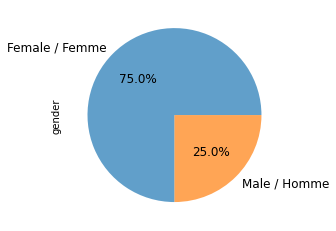

In [487]:
ratio_pie('gender')

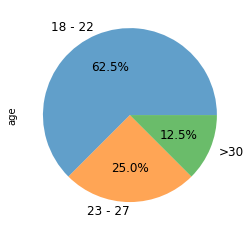

In [488]:
ratio_pie('age')

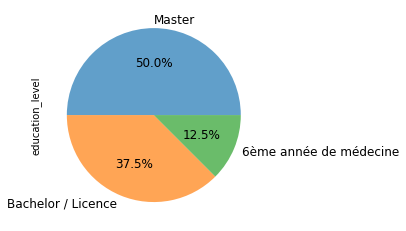

In [489]:
ratio_pie('education_level')

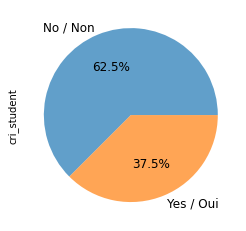

In [490]:
ratio_pie('cri_student')

Percentage Ratio:
Female / Femme    75.0
Male / Homme      25.0
Name: gender, dtype: float64


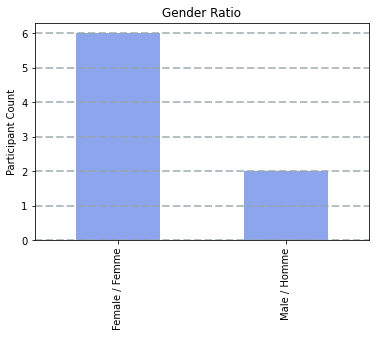

In [491]:
ratio('gender','royalblue')

Percentage Ratio:
Master                    50.0
Bachelor / Licence        37.5
6ème année de médecine    12.5
Name: education_level, dtype: float64


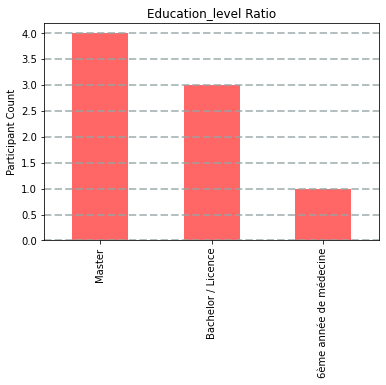

In [492]:
ratio('education_level','red')

Percentage Ratio:
No / Non     62.5
Yes / Oui    37.5
Name: cri_student, dtype: float64


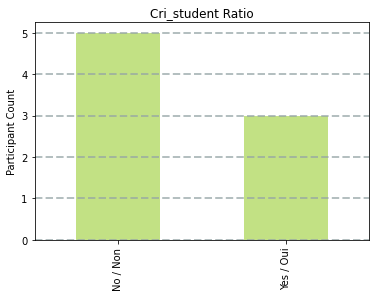

In [493]:
ratio('cri_student','yellowgreen')

Percentage Ratio:
18 - 22    62.5
23 - 27    25.0
>30        12.5
Name: age, dtype: float64


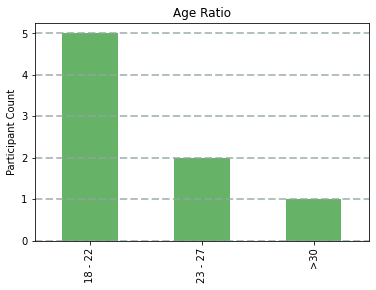

In [494]:
ratio('age','green')

> **Question 2** : What is the average sleep quality score(3 weeks) of those who are exposed to daily stress?

In [495]:
# df.sort_index(inplace=True)
# df_week1.sort_index(inplace=True)
# df_week2.sort_index(inplace=True)
# df_week3.sort_index(inplace=True)

In [496]:
df['week1_score'] = df_week1['sleeping_quality_score'].to_list()
df['week2_score'] = df_week2['sleeping_quality_score'].to_list()
# df['week3_score'] = df_week3['sleeping_quality_score']

In [498]:
# df['avg_score'] = (df['week1_score'] +df['week2_score']+df['week3_score']+df['sleeping_quality_score'])/3
df['avg_score'] = (df['week1_score'] +df['week2_score']+df['sleeping_quality_score'])/3

In [500]:
s_avg_score = df.loc[df['stress_level']== 'Everyday / Tous les jours']

In [505]:
sq_with_stress = round(s_avg_score['avg_score'].mean()) #only 1

In [506]:
perc_st = 100-(((sq_with_stress/9)*100))
print('Sleeping quality averege percentage who got stress everyday: %'+ str(perc_st) )

Sleeping quality averege percentage who got stress everyday: %88.88888888888889


In [507]:
# to visualise but with anonymised names

df.index = ['p1', 'p2','p3', 'p4', 'p5', 'p6',
               'p7', 'p8']

Stress level fairly effect upon our participants sleeping.



> **Question3** : What is the distribution of average sleeping quality score(%)?

In [508]:
df['avg_score_perc'] = 100-((df['avg_score']/9)*100)
df['avg_score_perc'].head()

p1    92.592593
p2    92.592593
p3    88.888889
p4    70.370370
p5    81.481481
Name: avg_score_perc, dtype: float64

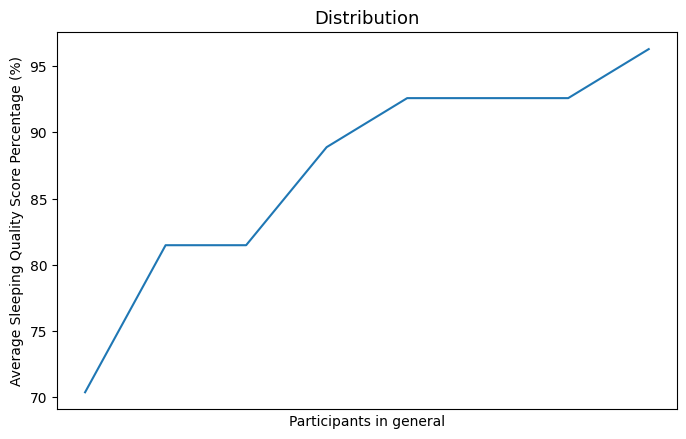

In [509]:
plt.figure(figsize=(8,5), dpi = 100)
plt.xlabel('Participants in general', fontsize = 10)
plt.ylabel('Average Sleeping Quality Score Percentage (%)', fontsize=10)
plt.title('Distribution', fontsize=13)
plt.plot(sorted(df['avg_score_perc']))
plt.xticks([])
plt.show()

> **Question 4** : What is the corrolation between parameters and sleeping quality?

**We have to chnage all values into numeric values to see corralation and it is going to help us for ML in future.**

In [510]:
# To not change our intial data set  which is all string and orginal we will copy our dataset for chnage numerical values
df_numeric =  df.copy()
df_numeric

,age,gender,education_level,cri_student,alone,have_pet,screen_time,stress_level,sleep_time,wake_time,time_outside,meeting_friends,times_of_wake,in_france,in_france_during_LD,email,time_fall_asleep,hours_of_sleep,sleeping_quality_score,week1_score,week2_score,avg_score,avg_score_perc
p1,18 - 22,Female / Femme,Master,No / Non,No / Non,No / Non,8,A few times (once or twice) / Quelques fois (u...,22:45,07:00,1,1,0,Yes / Oui,Yes / Oui,1,Instantly - less than 15 min / Instantanément ...,8.25,0,2,0,0.666667,92.592593
p2,18 - 22,Female / Femme,Bachelor / Licence,Yes / Oui,No / Non,"Yes and it doesn't require to go out / Oui, un...",10,A few times (once or twice) / Quelques fois (u...,23:30,08:30,1,5,0,Yes / Oui,Yes / Oui,2,Instantly - less than 15 min / Instantanément ...,9.00,0,2,0,0.666667,92.592593
p3,23 - 27,Male / Homme,Master,No / Non,No / Non,No / Non,6,Everyday / Tous les jours,23:30,07:30,10,3,1,Yes / Oui,Yes / Oui,3,15 to 30 min / De 15 à 30 minutes,8.00,1,1,1,1.000000,88.888889
p4,18 - 22,Female / Femme,Bachelor / Licence,Yes / Oui,Yes / Oui,No / Non,2,Often (three or four times) / Souvent (trois o...,22:00,08:00,1,8,2,Yes / Oui,Yes / Oui,4,15 to 30 min / De 15 à 30 minutes,10.00,2,2,4,2.666667,70.370370
p5,>30,Female / Femme,Master,Yes / Oui,No / Non,No / Non,8,Often (three or four times) / Souvent (trois o...,01:30,07:00,6,5,0,Yes / Oui,Yes / Oui,5,Instantly - less than 15 min / Instantanément ...,5.50,2,1,2,1.666667,81.481481
p6,18 - 22,Female / Femme,Bachelor / Licence,No / Non,Yes / Oui,No / Non,2,Often (three or four times) / Souvent (trois o...,00:45,07:30,8,7,0,Yes / Oui,Yes / Oui,6,Instantly - less than 15 min / Instantanément ...,6.75,1,0,1,0.666667,92.592593
p7,18 - 22,Female / Femme,Master,No / Non,Yes / Oui,No / Non,9,Often (three or four times) / Souvent (trois o...,01:15,07:30,1,7,0,Yes / Oui,Yes / Oui,7,15 to 30 min / De 15 à 30 minutes,6.25,2,1,2,1.666667,81.481481
p8,23 - 27,Male / Homme,6ème année de médecine,No / Non,No / Non,"Yes and it doesn't require to go out / Oui, un...",4,Never / Jamais,02:30,09:00,0,1,0,Yes / Oui,Yes / Oui,8,Instantly - less than 15 min / Instantanément ...,6.50,1,0,0,0.333333,96.296296


In [511]:
# Looking age column unique values 
df_numeric['age'].unique()

array(['18 - 22', '23 - 27', '>30'], dtype=object)

In [512]:
#Changing values to numerical for better analyze
df_numeric.loc[ df_numeric['age'] == '<18', 'age'] = 0
df_numeric.loc[ df_numeric['age'] == '18 - 22', 'age'] = 1
df_numeric.loc[ df_numeric['age'] == '23 - 27', 'age'] = 2
df_numeric.loc[ df_numeric['age'] == '28 - 30', 'age'] = 3
df_numeric.loc[ df_numeric['age'] == '>30', 'age'] = 4
df_numeric.age = df_numeric.age.astype(int) 

In [513]:
df_numeric.head()

,age,gender,education_level,cri_student,alone,have_pet,screen_time,stress_level,sleep_time,wake_time,time_outside,meeting_friends,times_of_wake,in_france,in_france_during_LD,email,time_fall_asleep,hours_of_sleep,sleeping_quality_score,week1_score,week2_score,avg_score,avg_score_perc
p1,1,Female / Femme,Master,No / Non,No / Non,No / Non,8,A few times (once or twice) / Quelques fois (u...,22:45,07:00,1,1,0,Yes / Oui,Yes / Oui,1,Instantly - less than 15 min / Instantanément ...,8.25,0,2,0,0.666667,92.592593
p2,1,Female / Femme,Bachelor / Licence,Yes / Oui,No / Non,"Yes and it doesn't require to go out / Oui, un...",10,A few times (once or twice) / Quelques fois (u...,23:30,08:30,1,5,0,Yes / Oui,Yes / Oui,2,Instantly - less than 15 min / Instantanément ...,9.00,0,2,0,0.666667,92.592593
p3,2,Male / Homme,Master,No / Non,No / Non,No / Non,6,Everyday / Tous les jours,23:30,07:30,10,3,1,Yes / Oui,Yes / Oui,3,15 to 30 min / De 15 à 30 minutes,8.00,1,1,1,1.000000,88.888889
p4,1,Female / Femme,Bachelor / Licence,Yes / Oui,Yes / Oui,No / Non,2,Often (three or four times) / Souvent (trois o...,22:00,08:00,1,8,2,Yes / Oui,Yes / Oui,4,15 to 30 min / De 15 à 30 minutes,10.00,2,2,4,2.666667,70.370370
p5,4,Female / Femme,Master,Yes / Oui,No / Non,No / Non,8,Often (three or four times) / Souvent (trois o...,01:30,07:00,6,5,0,Yes / Oui,Yes / Oui,5,Instantly - less than 15 min / Instantanément ...,5.50,2,1,2,1.666667,81.481481


In [514]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, p1 to p8
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     8 non-null      int64  
 1   gender                  8 non-null      object 
 2   education_level         8 non-null      object 
 3   cri_student             8 non-null      object 
 4   alone                   8 non-null      object 
 5   have_pet                8 non-null      object 
 6   screen_time             8 non-null      int64  
 7   stress_level            8 non-null      object 
 8   sleep_time              8 non-null      object 
 9   wake_time               8 non-null      object 
 10  time_outside            8 non-null      int64  
 11  meeting_friends         8 non-null      int64  
 12  times_of_wake           8 non-null      int64  
 13  in_france               8 non-null      object 
 14  in_france_during_LD     8 non-null      object 
 

In [515]:
# We did age column into the numeric values. Now we will go on with gender
df_numeric.loc[ df_numeric['gender'] == 'Female / Femme','gender'] = 0
df_numeric.loc[ df_numeric['gender'] == 'Male / Homme','gender'] = 1
df_numeric.loc[ df_numeric['gender'] == 'Prefer not to say / Préfère ne pas se prononcer', 'gender'] = 2
df_numeric.gender = df_numeric.gender.astype(int) 

In [516]:
# education_level
df_numeric['education_level'].unique()

array(['Master', 'Bachelor / Licence', '6ème année de médecine'],
      dtype=object)

In [518]:
df_numeric.loc[ df_numeric['education_level'] == 'Master','education_level'] = 0
df_numeric.loc[ df_numeric['education_level'] == 'PhD / Doctorat','education_level'] = 1
df_numeric.loc[ df_numeric['education_level'] == '6ème année de médecine','education_level'] = 1
df_numeric.loc[ df_numeric['education_level'] == 'Postdoc', 'education_level'] = 2
df_numeric.loc[ df_numeric['education_level'] == 'Bachelor / Licence', 'education_level'] = 3
df_numeric.education_level = df_numeric.education_level.astype(int) 

In [519]:
# cri_student
df_numeric['cri_student'].unique()

array(['No / Non', 'Yes / Oui'], dtype=object)

In [520]:
df_numeric.loc[ df_numeric['cri_student'] == 'No','cri_student'] = 0
df_numeric.loc[ df_numeric['cri_student'] == 'Yes','cri_student'] = 1
df_numeric.education_level = df_numeric.education_level.astype(int)

In [521]:
df_numeric['alone'].unique()


array(['No / Non', 'Yes / Oui'], dtype=object)

In [522]:
df_numeric.loc[ df_numeric['alone'] == 'No / Non','alone'] = 0
df_numeric.loc[ df_numeric['alone'] == 'Yes / Oui','alone'] = 1
df_numeric.loc[ df_numeric['alone'] == "Student Residence (I guess that's no)",'alone'] = 2
df_numeric.loc[ df_numeric['alone'] == 'En résidence universitaire','alone'] = 3
df_numeric.loc[ df_numeric['alone'] == 'Residence','alone'] = 4
df_numeric.alone = df_numeric.alone.astype(int)

In [523]:
df_numeric['have_pet'].unique()

array(['No / Non',
       "Yes and it doesn't require to go out / Oui, un animal qui ne nécessite pas de sortir"],
      dtype=object)

In [524]:
df_numeric.loc[ df_numeric['have_pet'] == 'No / Non','have_pet'] = 0
df_numeric.loc[ df_numeric['have_pet'] == "Yes and it doesn't require to go out / Oui, un animal qui ne nécessite pas de sortir",'have_pet'] = 1
df_numeric.loc[ df_numeric['have_pet'] == 'Yes and it requires to go out (e.g. dog) / Oui, un animal qui nécessite de sortir (comme un chien)','have_pet'] = 2
df_numeric.have_pet = df_numeric.have_pet.astype(int)

In [525]:
df_numeric['stress_level'].unique()

array(['A few times (once or twice) / Quelques fois (une fois ou deux)',
       'Everyday / Tous les jours',
       'Often (three or four times) / Souvent (trois ou quatre fois)',
       'Never / Jamais'], dtype=object)

In [526]:
df_numeric.loc[ df_numeric['stress_level'] == 'Often (three or four times) / Souvent (trois ou quatre fois)','stress_level'] = 0
df_numeric.loc[ df_numeric['stress_level'] == 'Never / Jamais','stress_level'] = 1
df_numeric.loc[ df_numeric['stress_level'] == 'A few times (once or twice) / Quelques fois (une fois ou deux)','stress_level'] = 2
df_numeric.loc[ df_numeric['stress_level'] == 'Everyday / Tous les jours','stress_level'] = 3
df_numeric.stress_level = df_numeric.stress_level.astype(int)

In [527]:
df_numeric['in_france'].unique()

array(['Yes / Oui'], dtype=object)

In [528]:
df_numeric.loc[ df_numeric['in_france'] == 'Yes / Oui','in_france'] = 0
df_numeric.loc[ df_numeric['in_france'] == 'Moved in France from Japan on November 29','in_france'] = 1
df_numeric.loc[ df_numeric['in_france'] == 'Italy','in_france'] = 1
df_numeric.in_france = df_numeric.in_france.astype(int)

In [529]:
df_numeric['time_fall_asleep'].unique()


array(['Instantly - less than 15 min / Instantanément - moins de 15 minutes',
       '15 to 30 min / De 15 à 30 minutes'], dtype=object)

In [530]:
df_numeric.loc[ df_numeric['time_fall_asleep'] == 'Instantly - less than 15 min / Instantanément - moins de 15 minutes','time_fall_asleep'] = 0
df_numeric.loc[ df_numeric['time_fall_asleep'] == "More than 1h / Plus d'1h",'time_fall_asleep'] = 1
df_numeric.loc[ df_numeric['time_fall_asleep'] == '30 min to 1h / De 30 minutes à 1h' ,'time_fall_asleep'] = 2
df_numeric.loc[ df_numeric['time_fall_asleep'] == '15 to 30 min / De 15 à 30 minutes' ,'time_fall_asleep'] = 3
df_numeric.time_fall_asleep = df_numeric.time_fall_asleep.astype(int)

### Creating Social Factor Score
> Alone, does not have a pet, does not meet friends : 0 score
>
> Not alone, does not have a pet, does not meet friends : 1 score
>
> Alone, have a pet, does not meet friends : 1 score
>
> Alone, does not have a pet, meet friends(more than 2 times) : 1 score
>
> Not alone, have a pet, does not meet friends : 2 score
>
> Not alone, does not have a pet, meet friends(more than 2 times) : 2 score
> 
> Alone, have a pet, meet friends(more than 2 times) : 2 score
>
> Not alone, have a pet, meet friends(more than 2 times) : 3 score

In [531]:
df_numeric['socialization_factor'] = 0
for index, row in df_numeric.iterrows():
    if row['alone'] == 1:
        row['socialization_factor'] += 1
        df_numeric.at[index,'socialization_factor'] = row['socialization_factor']
    if row['have_pet'] == 1 or row['have_pet'] == 2 :
        row['socialization_factor'] += 1
        df_numeric.at[index,'socialization_factor'] = row['socialization_factor']
    if row['meeting_friends'] > 2:
        row['socialization_factor'] += 1
        df_numeric.at[index,'socialization_factor'] = row['socialization_factor'] 

In [532]:
df_num_new = df_numeric.copy()
df_num_new = df_num_new.drop(['sleep_time','wake_time','avg_score_perc','sleeping_quality_score','week1_score','week2_score','gender','education_level','cri_student','alone','have_pet', 'meeting_friends', 'in_france', 'in_france_during_LD'],axis = 1)

In [533]:
print(df_num_new)

    age  screen_time  ...  avg_score  socialization_factor
p1    1            8  ...   0.666667                     0
p2    1           10  ...   0.666667                     2
p3    2            6  ...   1.000000                     1
p4    1            2  ...   2.666667                     2
p5    4            8  ...   1.666667                     1
p6    1            2  ...   0.666667                     2
p7    1            9  ...   1.666667                     2
p8    2            4  ...   0.333333                     1

[8 rows x 10 columns]


Text(0.5, 1.0, 'Correlation')

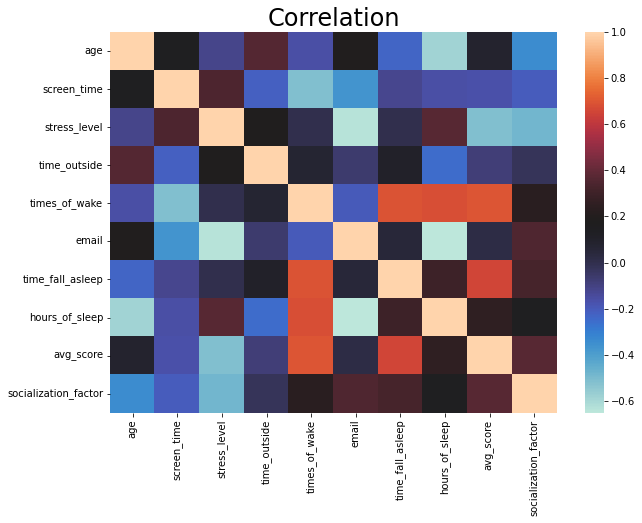

In [534]:
fig, ax = plt.subplots(figsize=(10,7)) 

sns.heatmap(df_num_new.corr(), cmap='icefire',ax=ax)
plt.title('Correlation', fontsize=24)

In [535]:
print("Corrlation values with average of sleeping quality score")
df_num_new.drop("avg_score", axis=1).apply(lambda x: x.corr(df_num_new.avg_score))

Corrlation values with average of sleeping quality score


age                     0.086711
screen_time            -0.166148
stress_level           -0.512989
time_outside           -0.078782
times_of_wake           0.700473
email                   0.025031
time_fall_asleep        0.651584
hours_of_sleep          0.255137
socialization_factor    0.370839
dtype: float64

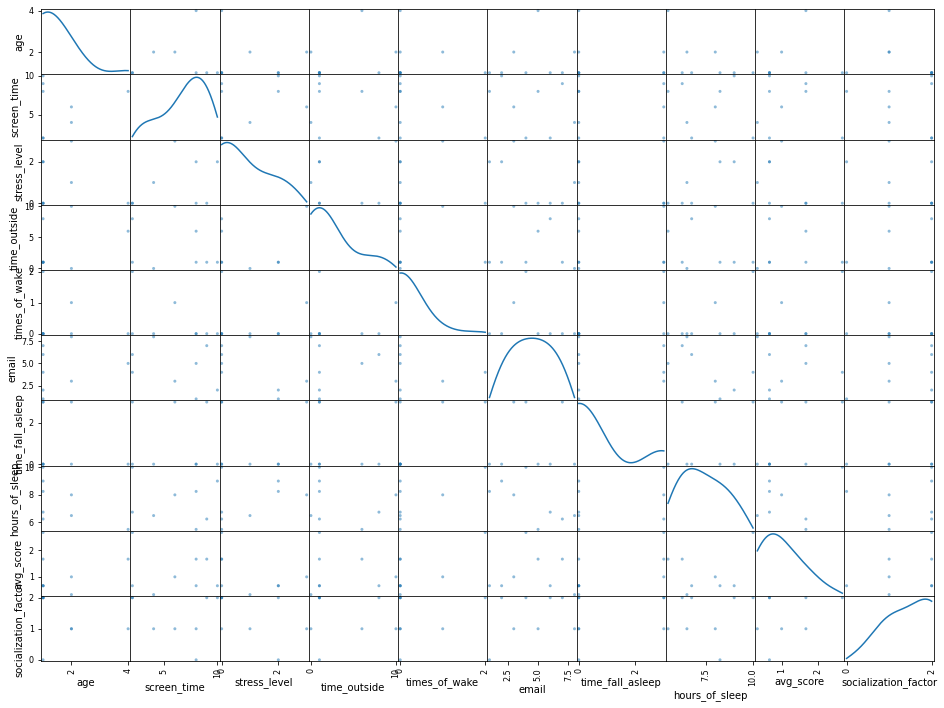

In [536]:
pd.plotting.scatter_matrix(df_num_new, figsize=(16, 12), diagonal='kde')
plt.show()

In [537]:
df_compare = df[['sleeping_quality_score']].copy()
df_compare.reset_index(inplace = True) 
df_compare['week']= 'week0'
add_1 = df[['week1_score']].copy()
add_1 = add_1.rename(columns={'week1_score':'sleeping_quality_score'})
add_1['week']= 'week1'
add_1.reset_index(inplace = True) 
add_2 = df[['week2_score']].copy()
add_2['week']= 'week2'
add_2 = add_2.rename(columns={'week2_score':'sleeping_quality_score'})
add_2.reset_index(inplace = True) 
# add_3 = df[['week3_score']].copy()
# add_3['week']= 'week3'
# add_3 = add_3.rename(columns={'week3_score':'sleeping_quality_score'})
# add_3.reset_index(inplace = True) 

In [538]:
df_compare = df_compare.append(add_1,ignore_index = True) 
df_compare = df_compare.append(add_2,ignore_index = True)
# df_compare = df_compare.append(add_3,ignore_index = True)

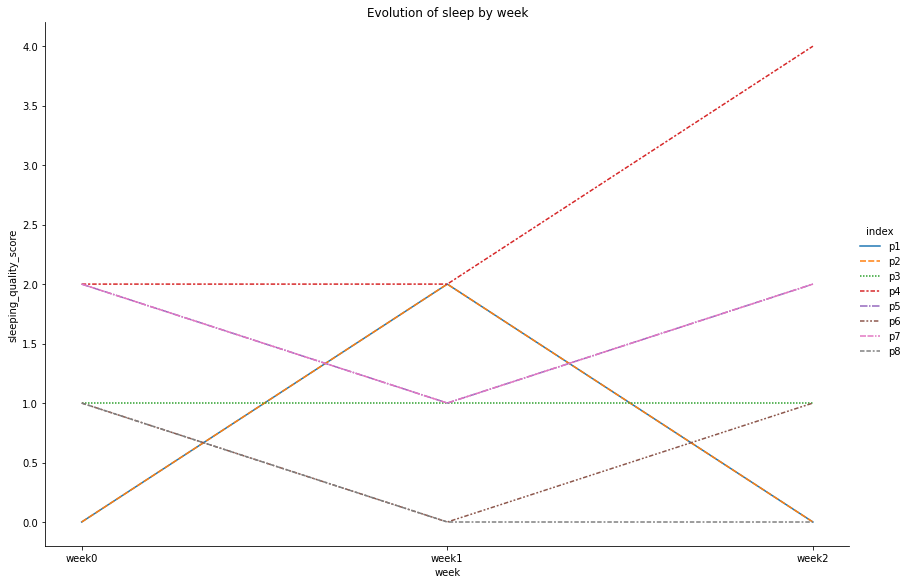

In [539]:
sns.relplot(x= 'week', y='sleeping_quality_score', data=df_compare,kind='line', hue='index',style="index",
ci=None, height=8, aspect=1.5).set(title = 'Evolution of sleep by week')

In [ ]:
df_numeric.head()

,age,gender,education_level,cri_student,alone,have_pet,screen_time,stress_level,sleep_time,wake_time,time_outside,meeting_friends,times_of_wake,in_france,in_france_during_LD,email,time_fall_asleep,hours_of_sleep,sleeping_quality_score,week1_score,week2_score,avg_score,avg_score_perc,socialization_factor
p1,4,1,1,No / Non,1,0,10,3,00:00,08:30,3,4,1,0,Yes / Oui,1,2,8.5,2,1.0,0.0,1.000000,88.888889,2
p2,1,0,3,No / Non,0,0,5,2,23:30,07:30,1,4,0,0,Yes / Oui,3,0,8.0,0,3.0,1.0,1.333333,85.185185,1
p3,2,1,0,No / Non,0,0,6,3,23:30,07:30,10,3,1,0,Yes / Oui,4,3,8.0,1,1.0,3.0,1.666667,81.481481,1
p4,1,0,0,No / Non,0,1,3,2,00:00,07:00,15,6,1,0,Yes / Oui,5,0,7.0,0,0.0,1.0,0.333333,96.296296,2
p5,1,0,3,No / Non,0,0,4,2,23:30,07:00,2,7,0,0,Yes / Oui,6,0,7.5,0,0.0,0.0,0.000000,100.000000,1


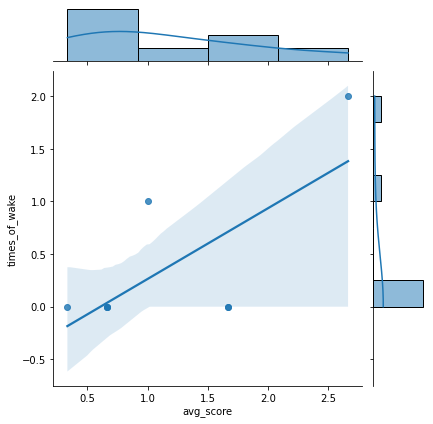

In [540]:
sns.jointplot(x = "avg_score", y = "times_of_wake", data = df_numeric, kind = "reg");

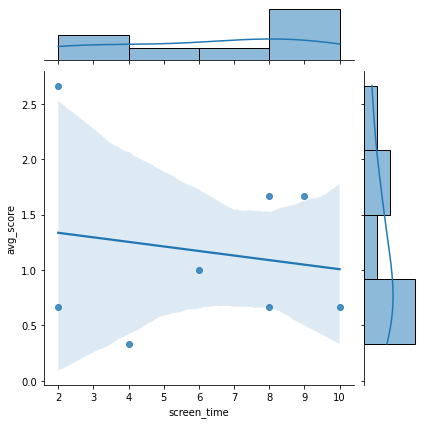

In [541]:
sns.jointplot(x = "screen_time", y = "avg_score", data = df_numeric, kind = "reg");

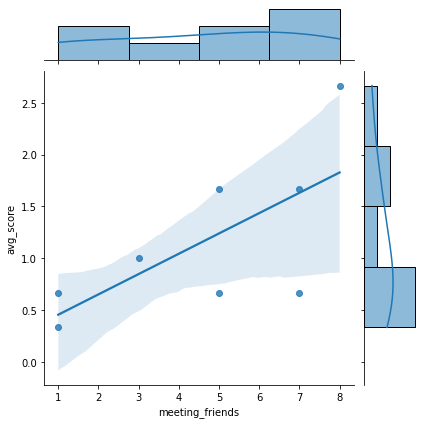

In [542]:
sns.jointplot(x = "meeting_friends", y = "avg_score", data = df_numeric, kind = "reg");

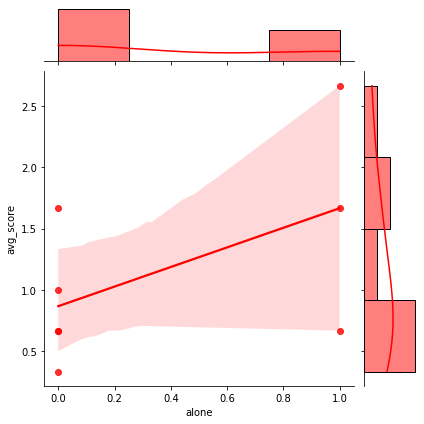

In [543]:
sns.jointplot(x = "alone", y = "avg_score", data = df_numeric, kind = "reg",color="red");


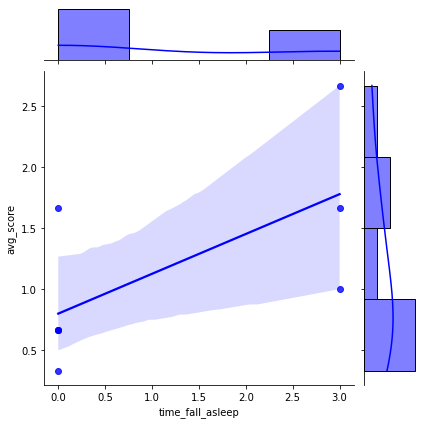

In [544]:
sns.jointplot(x = "time_fall_asleep", y = "avg_score", data = df_numeric, kind = "reg",color="blue");


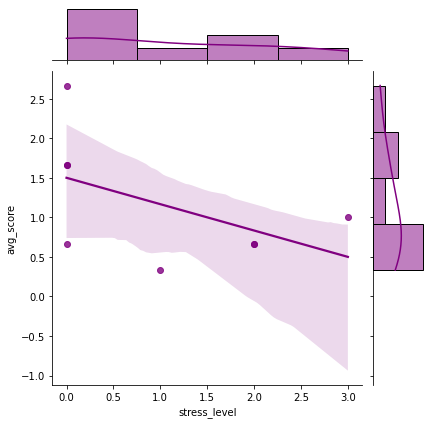

In [545]:
sns.jointplot(x = "stress_level", y = "avg_score", data = df_numeric, kind = "reg",color="purple");

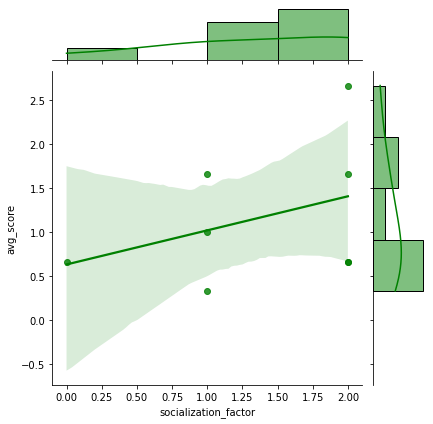

In [546]:

sns.jointplot(x = "socialization_factor", y = "avg_score", data = df_numeric, kind = "reg",color="green");

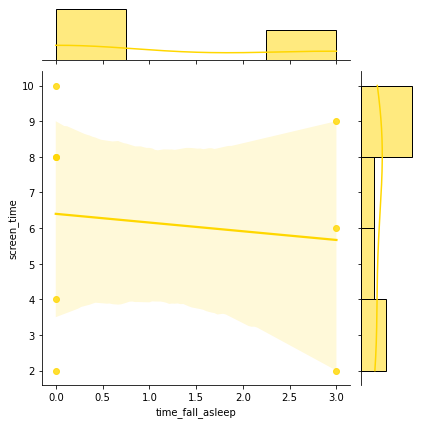

In [547]:
sns.jointplot(x = "time_fall_asleep", y = "screen_time", data = df_numeric, kind = "reg",color="gold");